In [71]:
import pandas as pd
import numpy as np

## Preprocessing Steps

In [72]:
data = pd.read_excel("Dataset Publish 230424.xlsx", sheet_name="Sheet1")

data

,ID,title,urls
0,0,Benarkah Konsumsi Buah Bisa Mengecilkan Perut ...,https://www.kompas.com/tren/read/2024/04/08/21...
1,1,"Sejarah Mudik, Sudah Ada sejak Zaman Majapahit...",https://www.kompas.com/tren/read/2024/04/08/20...
2,2,Biaya kuliah Unimus 2024/2025 untuk Program Sa...,https://www.kompas.com/tren/read/2024/04/08/20...
3,3,"Modus Penipuan File APK Kembali Muncul, Kali I...",https://www.kompas.com/tren/read/2024/04/08/20...
4,4,"9 Hewan dengan Waktu Tidur Terlama di Dunia, A...",https://www.kompas.com/tren/read/2024/04/08/19...
...,...,...,...
110,143,Jam Buka dan Harga Tiket Masuk Dusun Semilir S...,https://www.kompas.com/tren/read/2024/04/12/10...
111,144,"7 Fakta Unik Merkurius, Planet Paling Kecil da...",https://www.kompas.com/tren/read/2024/04/12/09...
112,145,Harga Tiket dan Jam Buka Wahana Keranjang Sult...,https://www.kompas.com/tren/read/2024/04/12/08...
113,146,8 Tempat Wisata Gua di Yogyakarta untuk Habisk...,https://www.kompas.com/tren/read/2024/04/12/07...


In [73]:
# Preprocess text
import requests
import nltk # For lemmatization
import re #Regex Library
import string

response = requests.get("https://gist.githubusercontent.com/Muhammad-Yunus/a3c2fe96f1ab7433b2cd9ed41eaae8e8/raw/17a6fb88df63d633a4a4ceb1cda0bcbe7e9f0a5b/NLTK%20-%20List%20Stop%20Word%20Indonesian.txt")

stopwords = response.text

def preprocess_text(text: str):
  lower_case_text = text.lower()

  # Tokenizing

  # Remove number
  lower_case_text = re.sub(r"\d+", "", lower_case_text)

  # Remove punctutation
  lower_case_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))

  words = lower_case_text.strip().split(" ")

  # Lemmatization

  cleaned_words = []

  for word in words:
    if(word not in stopwords):
      cleaned_words.append(word)

  return " ".join(str(word) for word in cleaned_words)

data['cleaned_title'] = [ preprocess_text(title) for title in data["title"] ]

In [74]:
# Scrape web contents

from bs4 import BeautifulSoup

def scrape_web(page: str):
  page_to_scrape = requests.get(f"{page}?page=all") # Get all instead of paginated web
  soup = BeautifulSoup(page_to_scrape.content, "html.parser")

  contents = soup.find("div", attrs={"class":"read__content"}) # Get content inside

  paragraphs = contents.find_all("p") # Most content are on <p> tag

  data = []
  for p in paragraphs:
      data.append(p.text.strip().replace("\xa0", " "))

  return ' '.join(data)

contents = []
for page in data["urls"]: # Get all scraped content from every url.
  content = scrape_web(page)
  contents.append(content)

data['content'] = contents

data.head()

,ID,title,urls,cleaned_title,content
0,0,Benarkah Konsumsi Buah Bisa Mengecilkan Perut ...,https://www.kompas.com/tren/read/2024/04/08/21...,konsumsi mengecilkan perut buncit,KOMPAS.com - Media sosial X ramai membahas so...
1,1,"Sejarah Mudik, Sudah Ada sejak Zaman Majapahit...",https://www.kompas.com/tren/read/2024/04/08/20...,sejarah mudik zaman majapahit populer lebaran,KOMPAS.com - Lebaran dan mudik adalah dua kata...
2,2,Biaya kuliah Unimus 2024/2025 untuk Program Sa...,https://www.kompas.com/tren/read/2024/04/08/20...,biaya kuliah unimus program sarjana,KOMPAS.com - Universitas Muhammadiyah Semaran...
3,3,"Modus Penipuan File APK Kembali Muncul, Kali I...",https://www.kompas.com/tren/read/2024/04/08/20...,modus penipuan file muncul surat phk kantor pusat,KOMPAS.com - Penipuan online berkedok surat p...
4,4,"9 Hewan dengan Waktu Tidur Terlama di Dunia, A...",https://www.kompas.com/tren/read/2024/04/08/19...,hewan tidur terlama dunia mencapai jam sehari,"KOMPAS.com - Sama seperti manusia, hewan juga..."


In [75]:
# Process content

def process_content(row): # Remove the "Kompas.COM -"
  if ('-' in row):
    return row.split("-", 1)[1].strip()
  else:
    return row

data['content'] = data['content'].apply(process_content)

data['cleaned_content'] = [ preprocess_text(content) for content in data["content"] ]

data.head()

,ID,title,urls,cleaned_title,content,cleaned_content
0,0,Benarkah Konsumsi Buah Bisa Mengecilkan Perut ...,https://www.kompas.com/tren/read/2024/04/08/21...,konsumsi mengecilkan perut buncit,Media sosial X ramai membahas soal konsumsi bu...,media sosial x ramai membahas konsumsi mengeci...
1,1,"Sejarah Mudik, Sudah Ada sejak Zaman Majapahit...",https://www.kompas.com/tren/read/2024/04/08/20...,sejarah mudik zaman majapahit populer lebaran,Lebaran dan mudik adalah dua kata yang tak bis...,lebaran mudik dilepaskan momen lebaran peranta...
2,2,Biaya kuliah Unimus 2024/2025 untuk Program Sa...,https://www.kompas.com/tren/read/2024/04/08/20...,biaya kuliah unimus program sarjana,Universitas Muhammadiyah Semarang (Unimus) ada...,universitas muhammadiyah semarang unimus pergu...
3,3,"Modus Penipuan File APK Kembali Muncul, Kali I...",https://www.kompas.com/tren/read/2024/04/08/20...,modus penipuan file muncul surat phk kantor pusat,Penipuan online berkedok surat pemutusan hubun...,penipuan online berkedok surat pemutusan hubun...
4,4,"9 Hewan dengan Waktu Tidur Terlama di Dunia, A...",https://www.kompas.com/tren/read/2024/04/08/19...,hewan tidur terlama dunia mencapai jam sehari,"Sama seperti manusia, hewan juga membutuhkan t...",manusia hewan membutuhkan tidur istirahat pert...


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Analyze the whole data content with TF-IDF (basically I thought that document is similar from it's matched keywords)
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(data["cleaned_content"])

print(vectors.shape)

feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()

denseList = dense.tolist()

dense_train_vectors = vectors.toarray()


(115, 6336)


In [77]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Because TF-IDF Vector is so sparse, we use LSA to reduce it's dimension.

n_components = 100

svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

vectors_lsa = lsa.fit_transform(vectors)

print("Original shape:", vectors.shape)
print("Reduced shape:", vectors_lsa.shape)

Original shape: (115, 6336)
Reduced shape: (115, 100)


In [78]:
df_keywords = pd.DataFrame(data = dense, columns = feature_names)

df_keywords.head()

,abad,abadi,abbas,abdominal,abdurro,abilitas,abon,abrasif,abu,abuabu,...,zat,zebra,ziplock,zn,zona,zoo,zoonosis,zoonotis,zulfiati,zulhijah
0,0.0,0.0,0.0,0.032196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

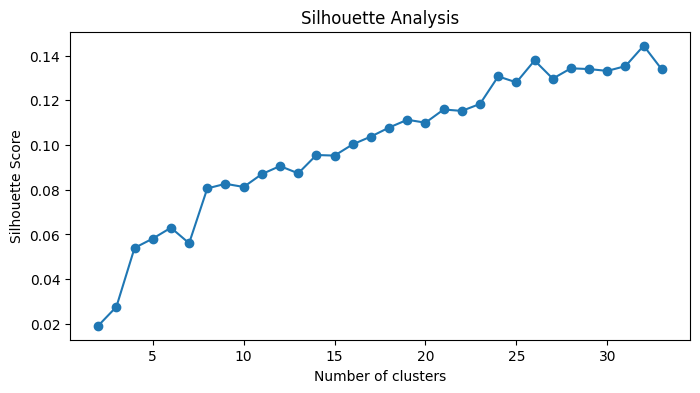

Cluster 0
adam, adaptasi, abu, ace, abad, adik, aksioma, abrasif, ady, adzim, akthar, adolof, abdominal, aisyah, agostino, 
Cluster 1
abad, abilitas, abdominal, adhyasta, aditia, abrasif, accurate, adaptasi, adik, achmad, aksioma, akrab, ahmad, adonan, ady, 
Cluster 2
abad, abdurro, abbas, accurate, agung, abundance, akhlak, adaptasi, adam, abu, adukaduk, abuabu, abon, ahli, adrian, 
Cluster 3
abadi, abbas, abad, aduk, agussumadi, adzim, ady, ahli, akuarium, aipda, addaruquthni, aktris, akreditasi, abilitas, ailatakum, 
Cluster 4
abuabu, abon, abad, adryamarthanino, abadi, adha, ahmad, aidin, abdominal, adventure, agama, akbar, adzim, adrenalin, adaptasi, 
Cluster 5
abadi, abad, abdurro, abrasif, abuabu, ajakan, adrian, airlines, adha, adrenalin, adukaduk, agung, ahwal, aisyah, alamat, 
Cluster 6
abilitas, abdurro, abdominal, abon, abadi, abad, ace, aceh, abundance, adryamarthanino, adventure, abu, agama, afrika, agostino, 
Cluster 7
abundance, acara, abdominal, abu, abrasif, adik, aba

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# try to find the best cluster
silhouette_scores = []
range_cluster = range(2, 30)

max_score = 0
best_k = 2

# Find the best cluster
for k in range_cluster:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vectors_lsa)
    score = silhouette_score(vectors_lsa, kmeans.labels_)
    if(score > max_score):
      max_score = score
      best_k = k

    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8,4))
plt.plot(range_cluster, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

k = best_k
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")

kmeans.fit(vectors_lsa)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
  print(f"Cluster {i}")
  for ind in order_centroids[i, :15]:
    print("%s" % terms[ind], end = ", ")
  print()

In [80]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# kmean_indices = clustering.fit_predict(dense_train_vectors)

# pca = PCA(n_components = 2)
# scatter_plot_points = pca.fit_transform(dense_train_vectors)

# colors = ["r", "b", "y"]

# x_axis = [o[0] for o in scatter_plot_points]
# y_axis = [o[1] for o in scatter_plot_points]

# fig, ax = plt.subplots(figsize = (8, 12))
# ax.scatter(x_axis, y_axis, c = [colors[d] for d in kmean_indices])

# Predicting Result

In [81]:
test_df = pd.read_excel("Sample Case 230424.xlsx", sheet_name="Sheet1")

test_df

,ID,title,urls
0,23,Ramai soal Obyek Tak Dikenal Melintas di Atas ...,https://www.kompas.com/tren/read/2024/04/08/11...
1,25,Puncak Gerhana Matahari Total Bisa Dipantau Se...,https://www.kompas.com/tren/read/2024/04/08/10...
2,33,Link Live Streaming Gerhana Matahari Total 8 A...,https://www.kompas.com/tren/read/2024/04/08/07...
3,52,Gerhana Matahari Total 8 April 2024 Sudah Dibe...,https://www.kompas.com/tren/read/2024/04/09/17...
4,135,"5 Manfaat Tidur Pakai Kaus Kaki, Apa Saja?",https://www.kompas.com/tren/read/2024/04/12/18...
5,136,7 Air Rebusan untuk Menurunkan Kolesterol Saat...,https://www.kompas.com/tren/read/2024/04/12/17...
6,93,Apa yang Terjadi pada Tubuh jika Terlalu Banya...,https://www.kompas.com/tren/read/2024/04/10/14...
7,94,6 Cara Alami Turunkan Asam Urat Setelah Makan ...,https://www.kompas.com/tren/read/2024/04/10/13...
8,28,Lulusan Ma'had Aly Diperbolehkan Ikut Seleksi ...,https://www.kompas.com/tren/read/2024/04/08/09...
9,47,Bacaan Niat dan Tata Cara Lengkap Shalat Idul ...,https://www.kompas.com/tren/read/2024/04/09/18...


In [82]:
test_df['cleaned_title'] = [ preprocess_text(title) for title in test_df["title"] ]

# Same as before just do some preprocessing data
contents = []
for page in test_df["urls"]:
  content = scrape_web(page)
  contents.append(content)

test_df['content'] = contents

test_df['content'] = test_df['content'].apply(process_content)

test_df['cleaned_content'] = [ preprocess_text(content) for content in test_df["content"] ]

result = test_df[["ID"]].copy()

test_df.head()

,ID,title,urls,cleaned_title,content,cleaned_content
0,23,Ramai soal Obyek Tak Dikenal Melintas di Atas ...,https://www.kompas.com/tren/read/2024/04/08/11...,ramai obyek dikenal melintas gunung merapi,Unggahan disertai video menyebut adanya obyek ...,unggahan disertai video obyek dikenal melintas...
1,25,Puncak Gerhana Matahari Total Bisa Dipantau Se...,https://www.kompas.com/tren/read/2024/04/08/10...,puncak gerhana matahari total dipantau selasa wib,Gerhana Matahari Total akan melintasi tiga neg...,gerhana matahari total melintasi negara kawasa...
2,33,Link Live Streaming Gerhana Matahari Total 8 A...,https://www.kompas.com/tren/read/2024/04/08/07...,link live streaming gerhana matahari total april,Fenomena astronomi berupa gerhana Matahari tot...,fenomena astronomi gerhana matahari total nega...
3,52,Gerhana Matahari Total 8 April 2024 Sudah Dibe...,https://www.kompas.com/tren/read/2024/04/09/17...,gerhana matahari total april diberitakan pakar...,Gerhana Matahari Total yang terjadi Senin (8/4...,gerhana matahari total senin wilayah benua ame...
4,135,"5 Manfaat Tidur Pakai Kaus Kaki, Apa Saja?",https://www.kompas.com/tren/read/2024/04/12/18...,manfaat tidur pakai kaus kaki,Tidur merupakan cara tubuh untuk mengistirahat...,tidur tubuh mengistirahatkan aktivitas seharih...


In [83]:
test_vectors = vectorizer.transform(test_df["cleaned_content"])

print("Test Original Vector", test_vectors.shape)

test_vectors_lsa = lsa.transform(test_vectors)

print("Test LSA Vector", test_vectors_lsa.shape)

test_clusters = kmeans.predict(test_vectors_lsa)

result["Cluster"] = test_clusters

Test Original Vector (33, 6336)
Test LSA Vector (33, 100)


In [84]:
print(result)
header = ["ID", "Cluster"]
# Mapped the result to result.csv
result.to_csv("result.csv", columns = header, index = False)

     ID  Cluster
0    23       14
1    25       14
2    33       14
3    52       14
4   135       14
5   136       10
6    93        8
7    94       10
8    28        2
9    47       24
10   48        2
11   49       24
12   50        1
13   77       24
14   80       25
15   87        7
16   92        9
17   95       22
18   96        4
19   97       10
20   37       18
21   46       26
22   55       14
23   57       16
24   65        5
25   70       19
26   72       14
27   74       16
28   85        5
29   86       21
30   88       26
31   83       12
32   29       18
